In [3]:
from funcoes import *
import yaml
from utilidades import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 12,5

In [4]:
df = fetch_data_from_db(const.consulta_sql)
df

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.00,350000.00,bom
1,Empresário,21,46557.0,Outros,Ens.Médio,MuitoBom,37.0,2,Víuvo,EcoPrestige,126855.00,500000.00,bom
2,Dentista,13,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.00,320000.00,ruim
3,Engenheiro,10,37262.0,Própria,Superior,Baixo,35.0,0,Divorciado,AgileXplorer,28767.00,250000.00,bom
4,Contador,6,52606.0,Própria,PósouMais,Justo,27.0,0,Casado,TrailConqueror,199564.00,400000.00,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Médico,36,47480.0,Própria,Superior,Bom,64.0,0,Divorciado,SpeedFury,217011.00,800000.00,bom
146,Advogado,39,20860.0,Alugada,Ens.Fundamental,Bom,37.0,0,Víuvo,DoubleDuty,139244.00,320000.00,ruim
147,Arquiteto,26,31394.0,Própria,PósouMais,MuitoBom,53.0,1,Divorciado,ElegantCruise,107035.00,300000.00,ruim
148,Médico,19,39769.0,None,Ens.Médio,Baixo,64.0,0,Solteiro,VoyageRoamer,54520.00,350000.00,bom


In [23]:
df["valorsolicitado"] = df["valorsolicitado"].astype(float)
df["valortotalbem"] = df["valortotalbem"].astype(float)

In [24]:
df.dtypes

profissao                object
tempoprofissao            int64
renda                   float64
tiporesidencia           object
escolaridade             object
score                    object
idade                   float64
dependentes               int64
estadocivil              object
produto                  object
valorsolicitado         float64
valortotalbem           float64
classe                   object
proporcao_solicitado     object
estabilidade_prof       float64
dtype: object

In [25]:
df["proporcao_solicitado"] = df["valortotalbem"] / df["valorsolicitado"]
df["estabilidade_prof"] = df["tempoprofissao"] / df["idade"]
df["compromet_renda"] = df["renda"] / df["valorsolicitado"]
df["proporcao_solicitado"] = df["proporcao_solicitado"].astype(float)
df["estabilidade_prof"] = df["estabilidade_prof"].astype(float)
df["compromet_renda"] = df["compromet_renda"].astype(float)

In [26]:
colunas_categoricas = ['profissao', 'tiporesidencia', 'escolaridade', 'score', 'estadocivil', 'produto']
colunas_numericas = ['tempoprofissao', 'renda', 'idade', 'dependentes', 'valorsolicitado', 'valortotalbem', 'proporcao_solicitado', 'estabilidade_prof', 'compromet_renda']

In [27]:
df.isnull().sum()

profissao               3
tempoprofissao          0
renda                   0
tiporesidencia          3
escolaridade            0
score                   0
idade                   0
dependentes             0
estadocivil             0
produto                 0
valorsolicitado         0
valortotalbem           0
classe                  0
proporcao_solicitado    0
estabilidade_prof       0
compromet_renda         0
dtype: int64

In [28]:
def plot_bars(df, colunas_categorias):
    for colunas in df[colunas_categoricas]:
        fig, ax = plt.subplots()
        agrupado = df.groupby(colunas).size()
        bars = plt.bar(agrupado.index, agrupado.values.flatten(), width=0.9)
        sns.set_theme("talk")

        for bar in bars:
            height = bar.get_height()
            ax.annotate("{}".format(height),
                        xy=(bar.get_x() + bar.get_width() /2, height),                         
                        textcoords="offset points", xytext=(0,3), fontsize=12,
                       va="bottom", ha="center")
            
        
        sns.despine(top=True, right=True, left=False)
        plt.xticks(rotation=45, ha="right")
        plt.xlabel(colunas, fontsize=15, fontweight="bold")
        plt.ylabel(f'Contagem de {colunas}', fontsize=15, fontweight="bold")        
        plt.title(f"Gráfico de barras de {colunas}", fontsize=20, fontweight="bold")
        plt.tight_layout()
        plt.show()


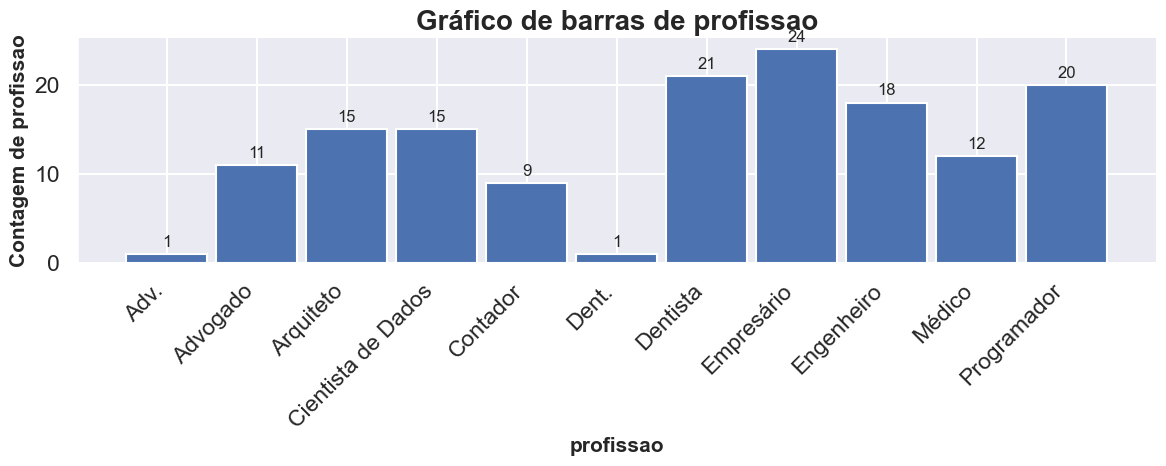

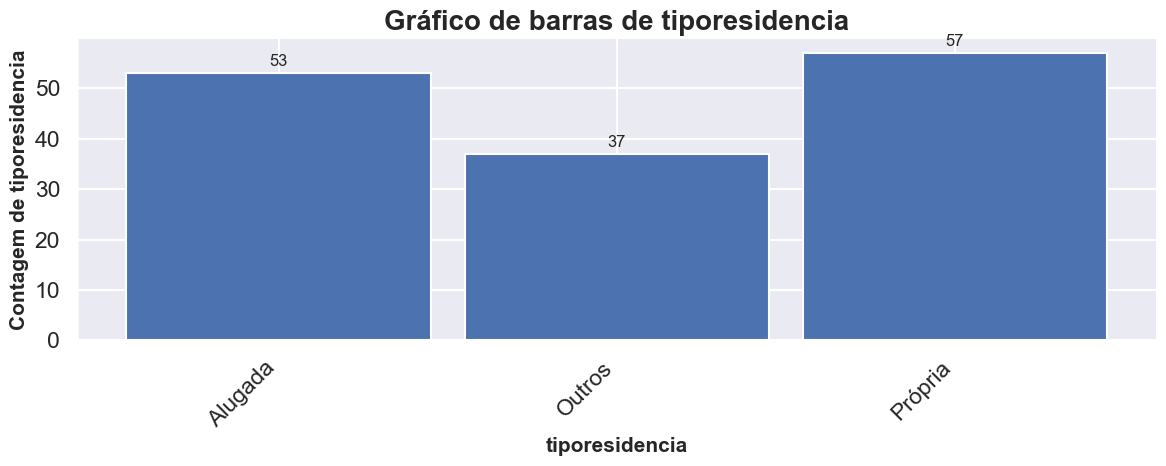

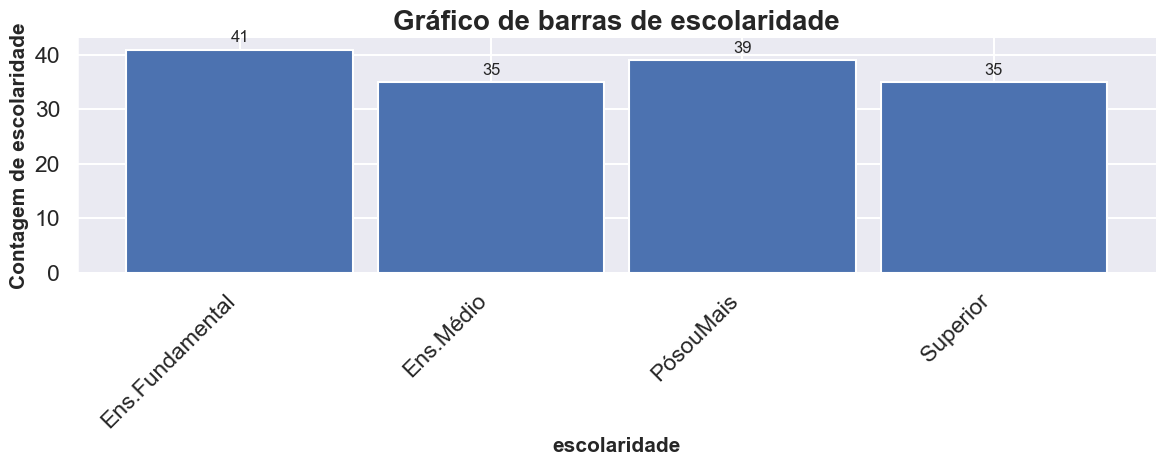

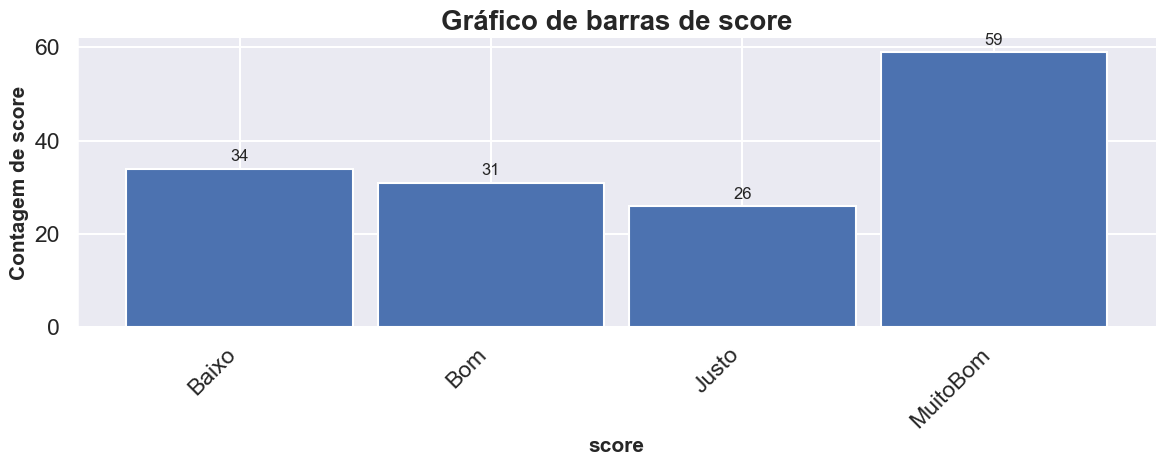

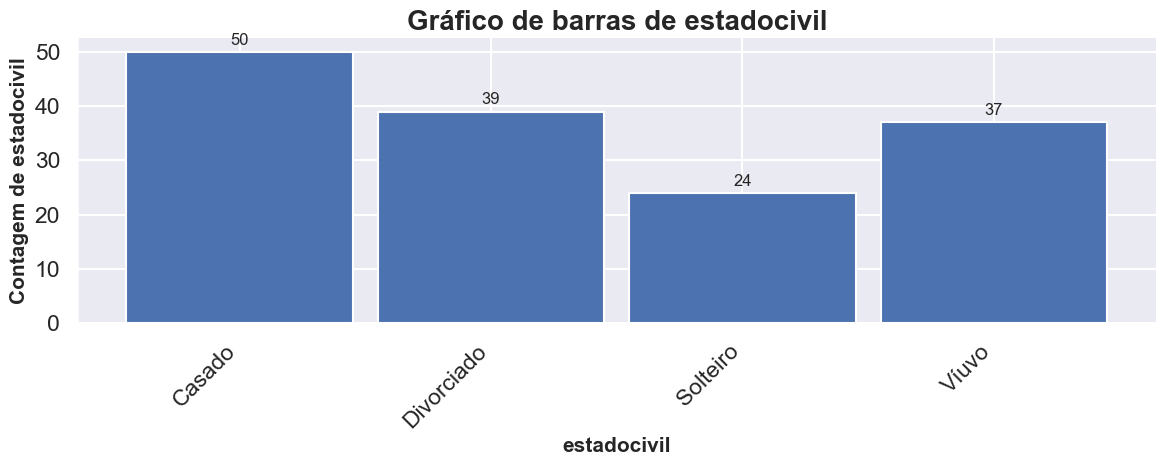

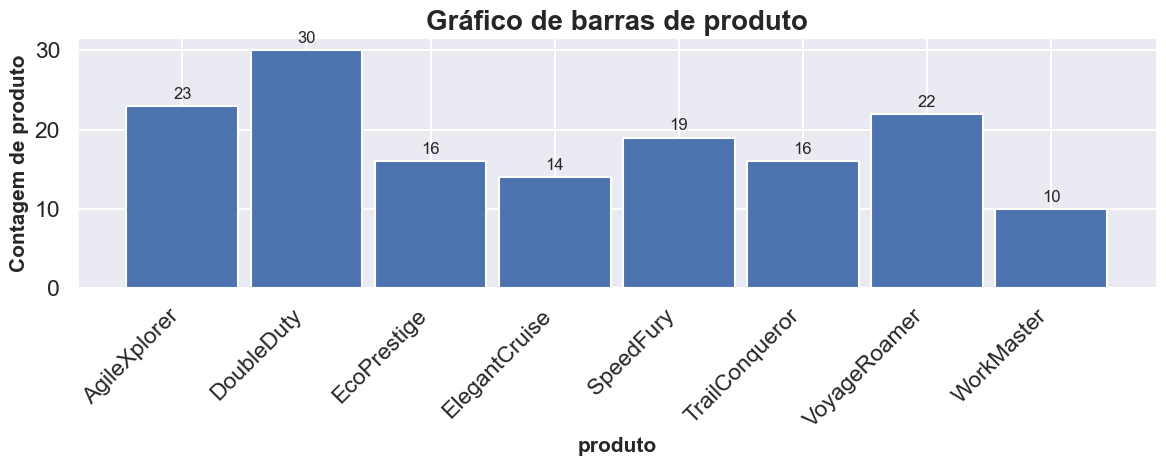

In [29]:
plot_bars(df, colunas_categoricas)

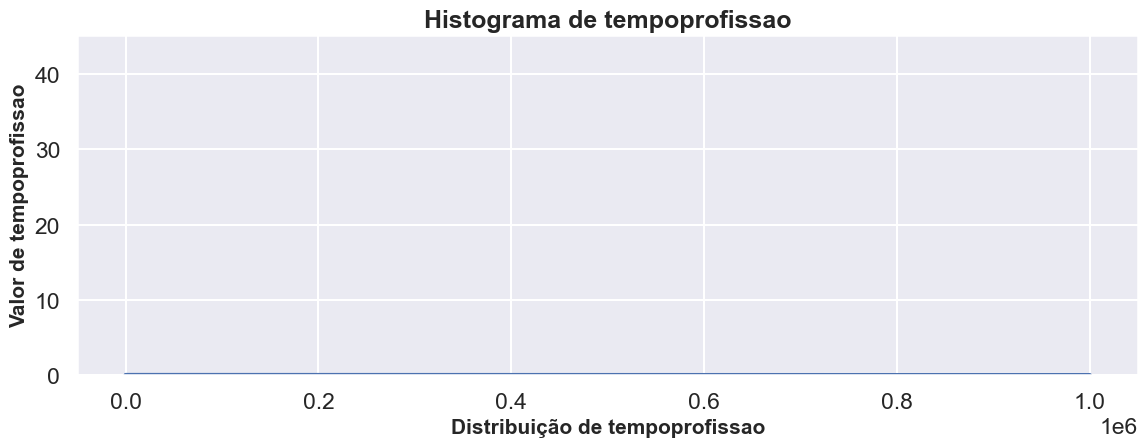

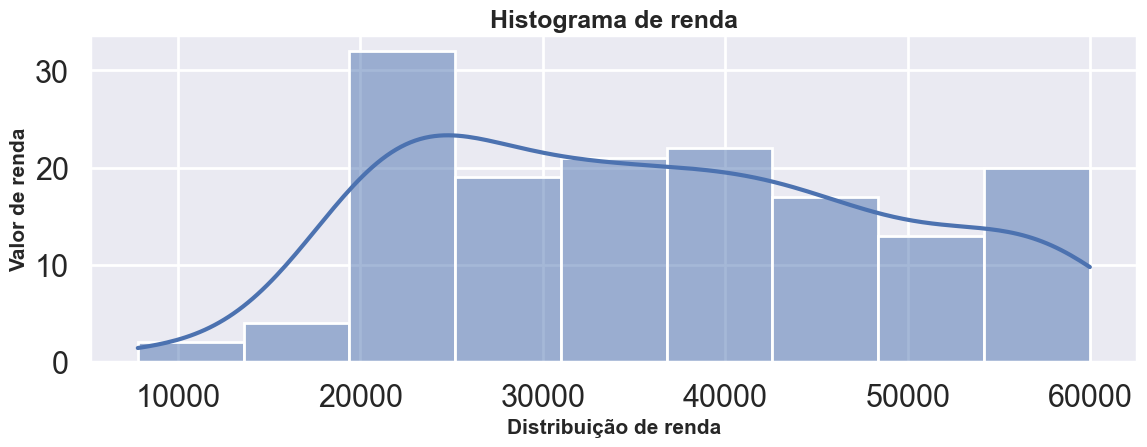

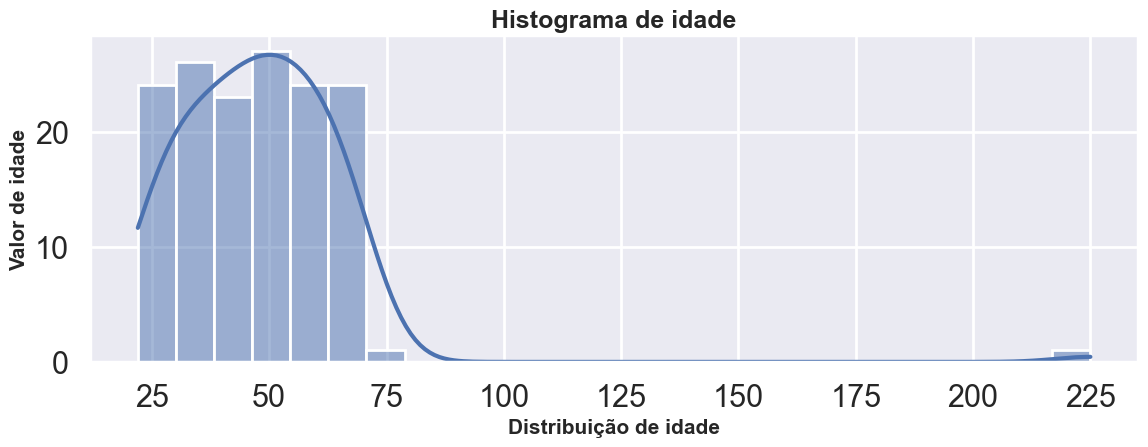

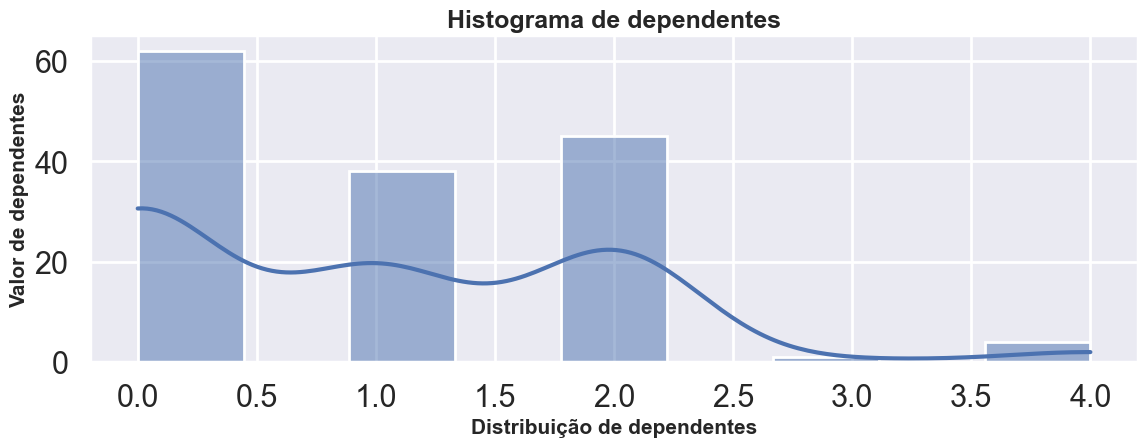

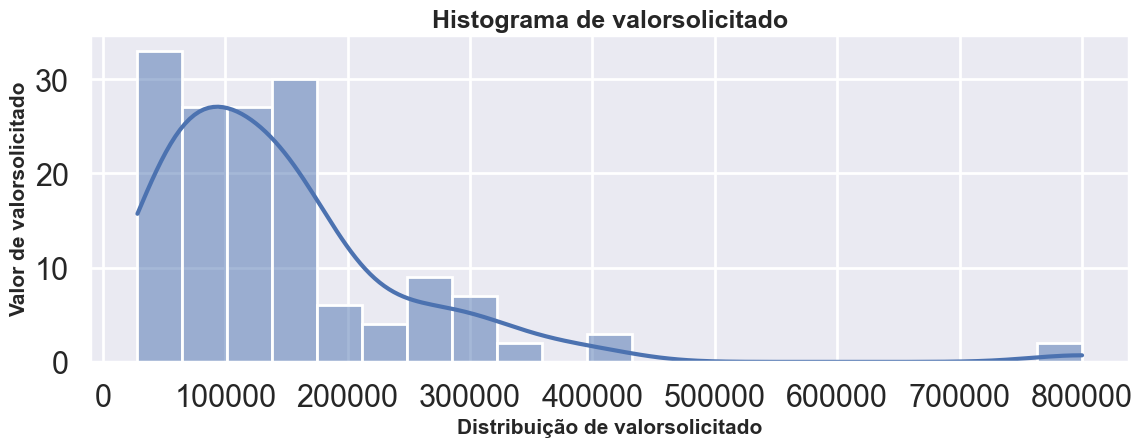

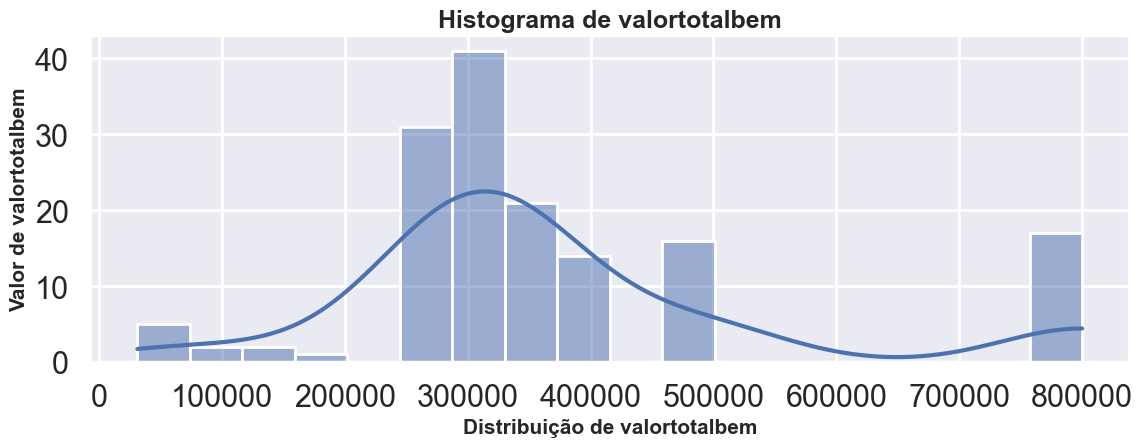

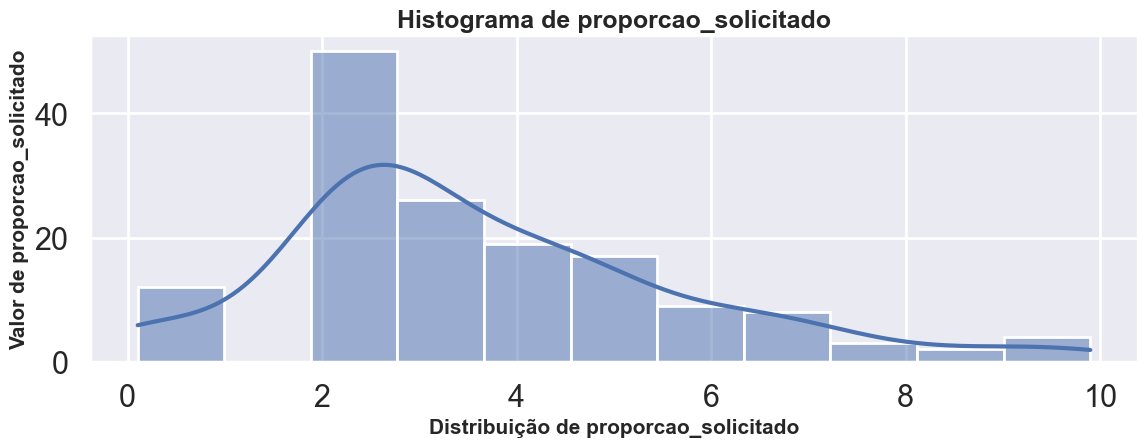

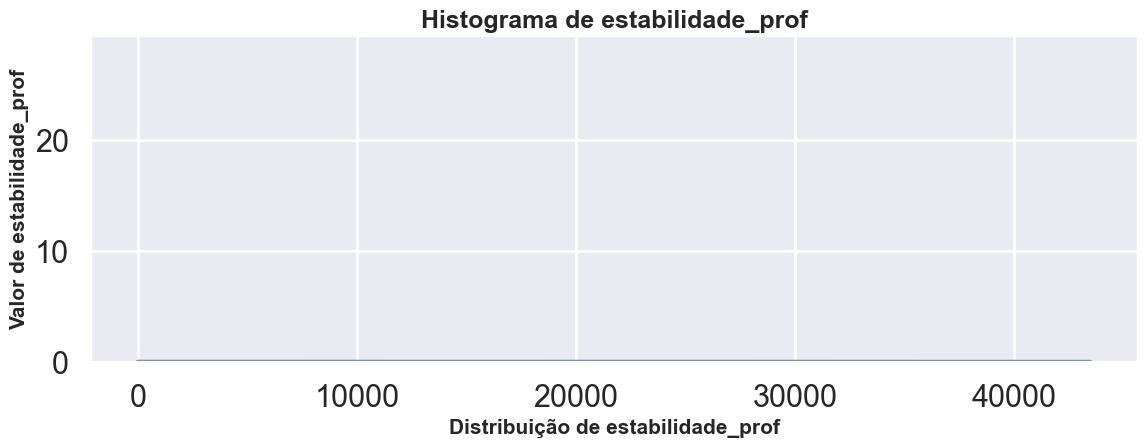

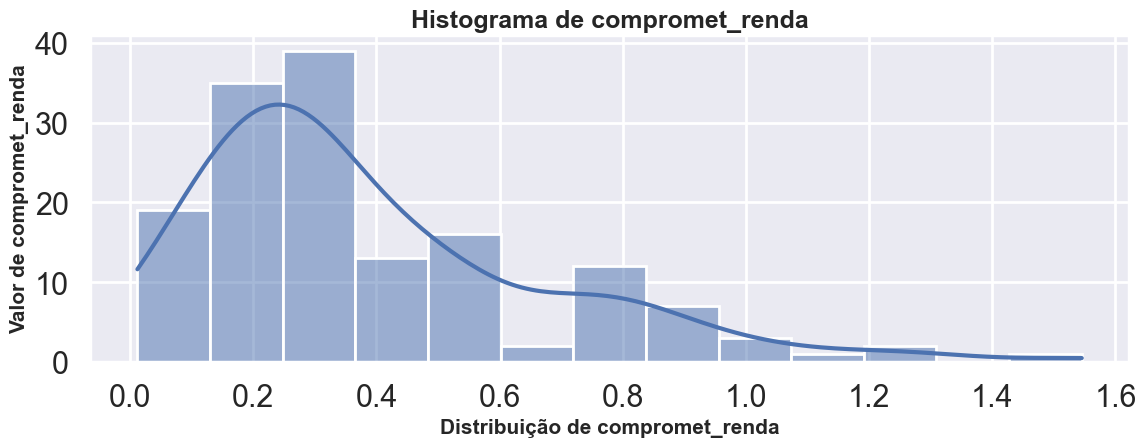

In [30]:
def plot_hist(df, colunas_numericas):
    for colunas in df[colunas_numericas]:
        fig, ax = plt.subplots()
        sns.set("poster")
    
        sns.histplot(df, x=colunas, bins="auto", kde=True)
        plt.ylabel(f"Valor de {colunas}", fontsize=12, fontweight="bold")
        plt.xlabel(f"Distribuição de {colunas}", fontsize=12, fontweight="bold")
        plt.title(f"Histograma de {colunas}", fontsize=18, fontweight="bold")
        plt.tight_layout()
        plt.show()
plot_hist(df, colunas_numericas)        

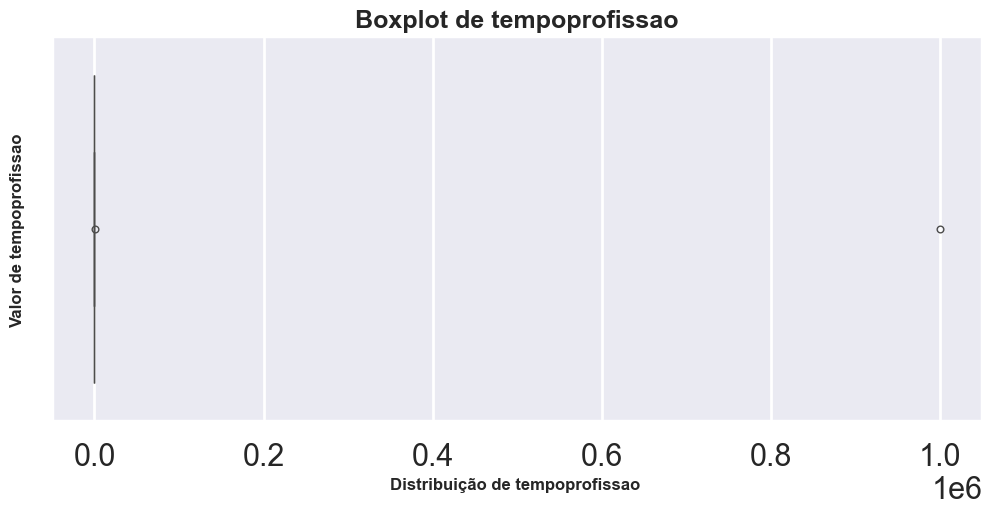

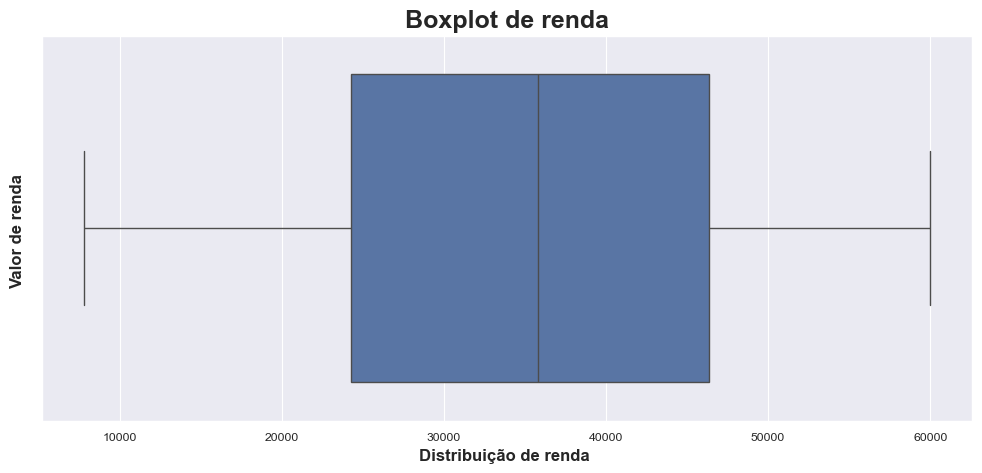

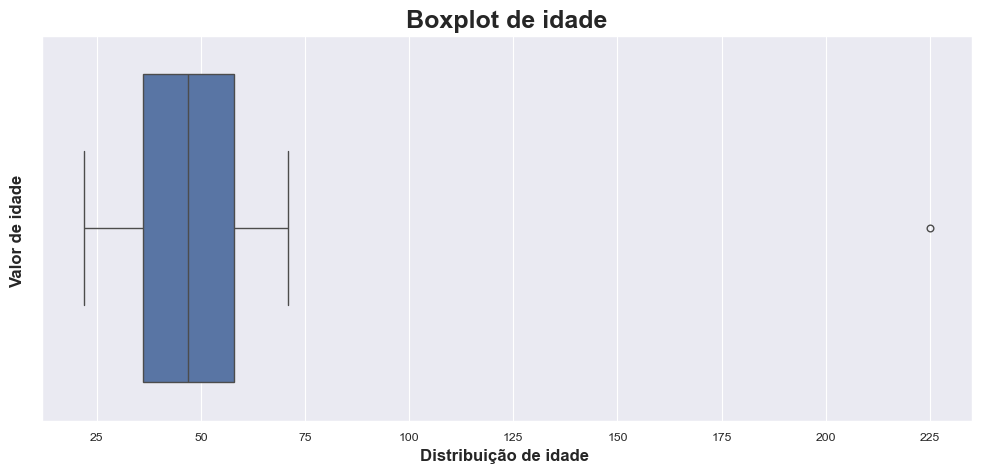

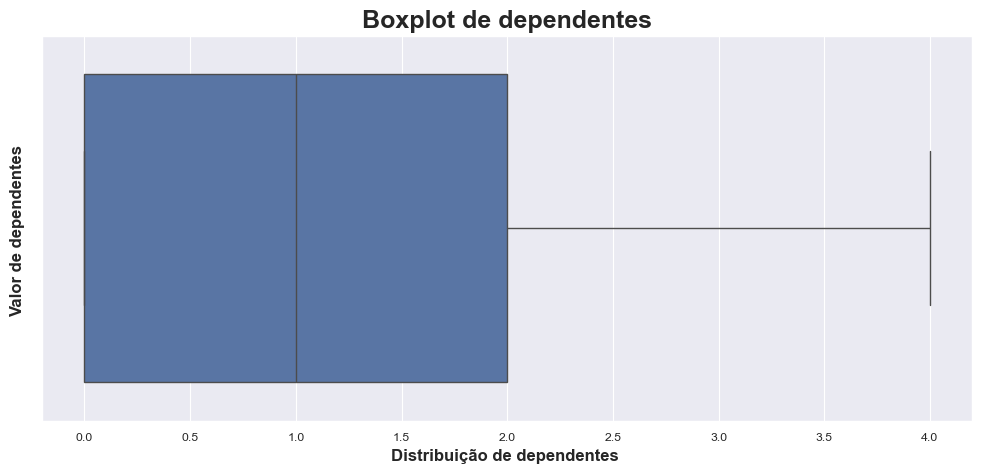

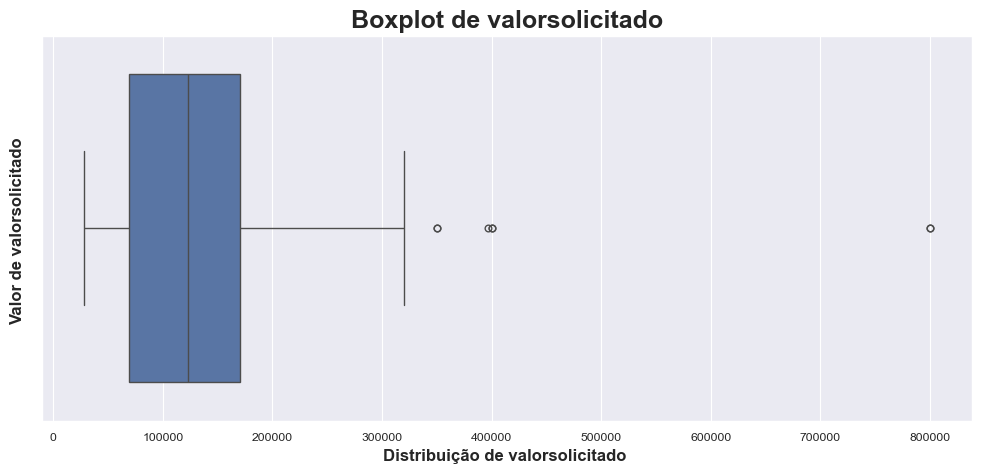

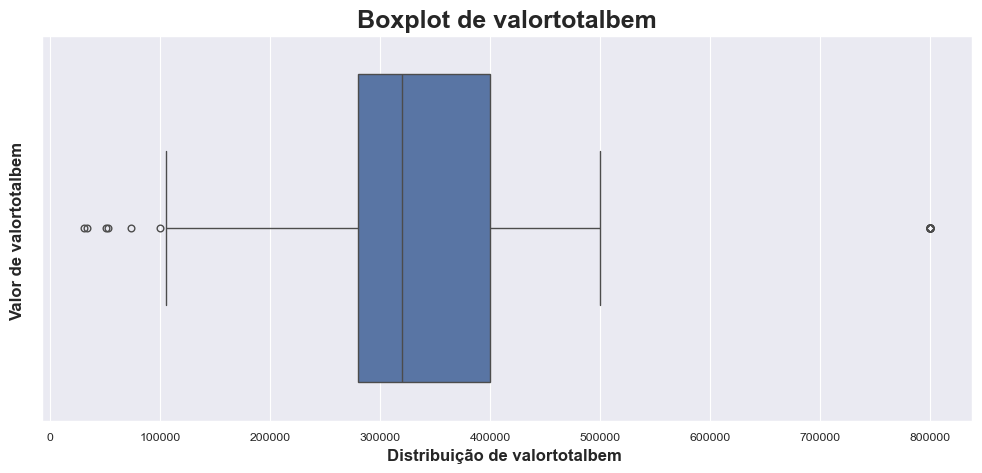

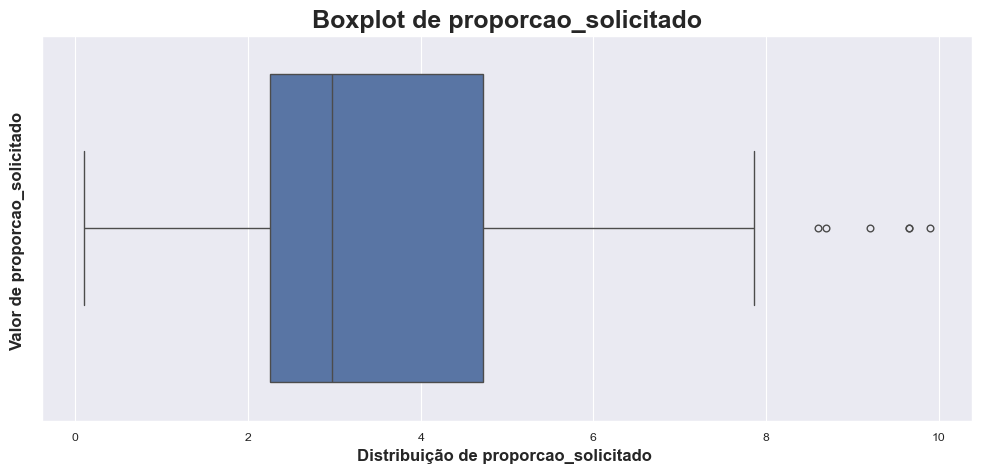

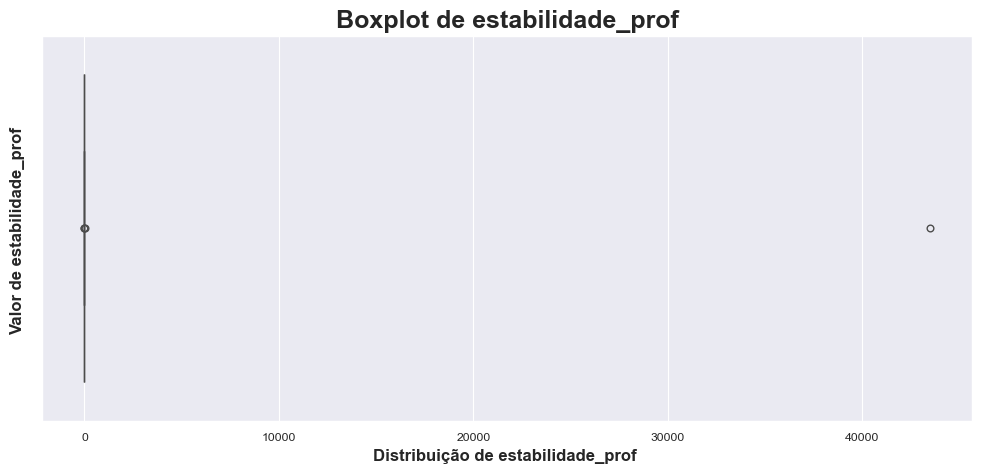

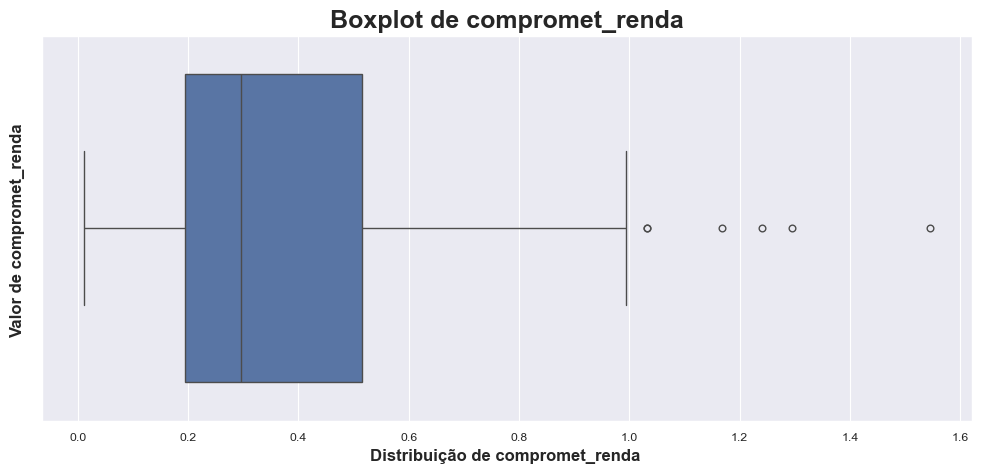

In [31]:
def plot_boxplot(df, colunas_numericas):
    for colunas in colunas_numericas:
        fig, ax = plt.subplots()
        sns.set("paper")

        sns.boxplot(df, x=colunas, orient="horizontal")
        plt.title(f"Boxplot de {colunas}", fontsize=18, fontweight="bold")
        plt.xlabel(f"Distribuição de {colunas} ", fontsize=12, fontweight="bold")
        plt.ylabel(f"Valor de {colunas} ", fontsize=12, fontweight="bold")
        plt.show()
plot_boxplot(df, colunas_numericas)

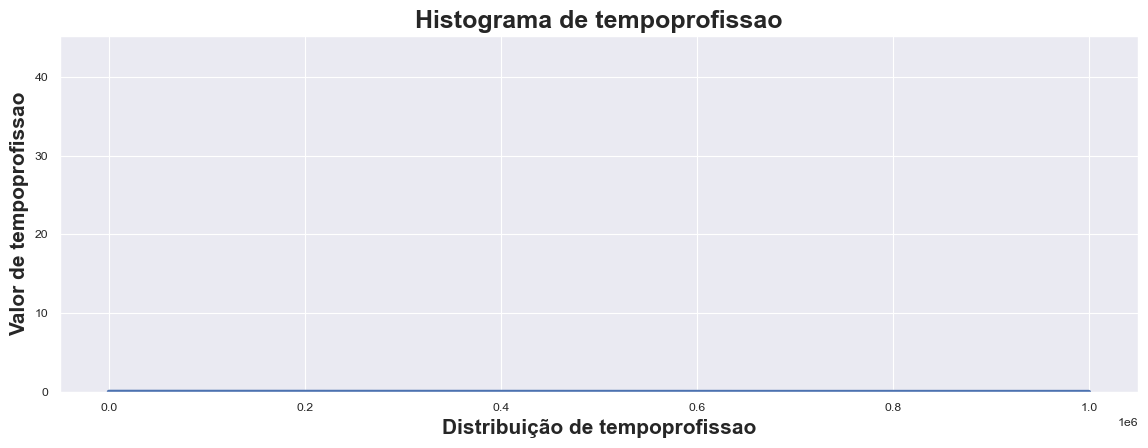

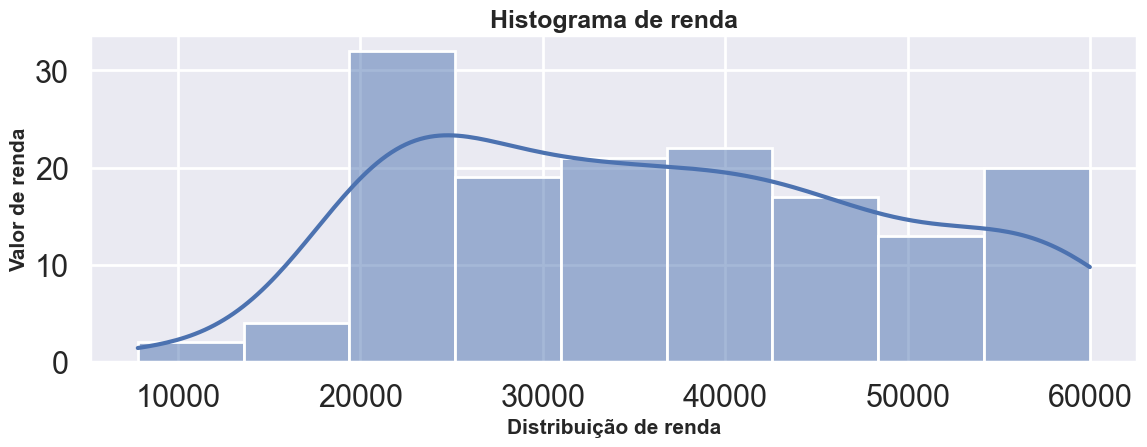

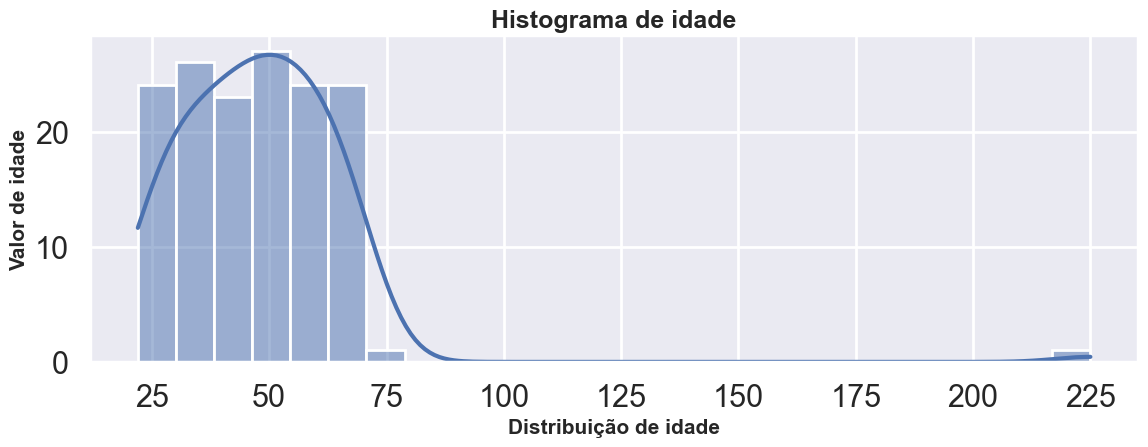

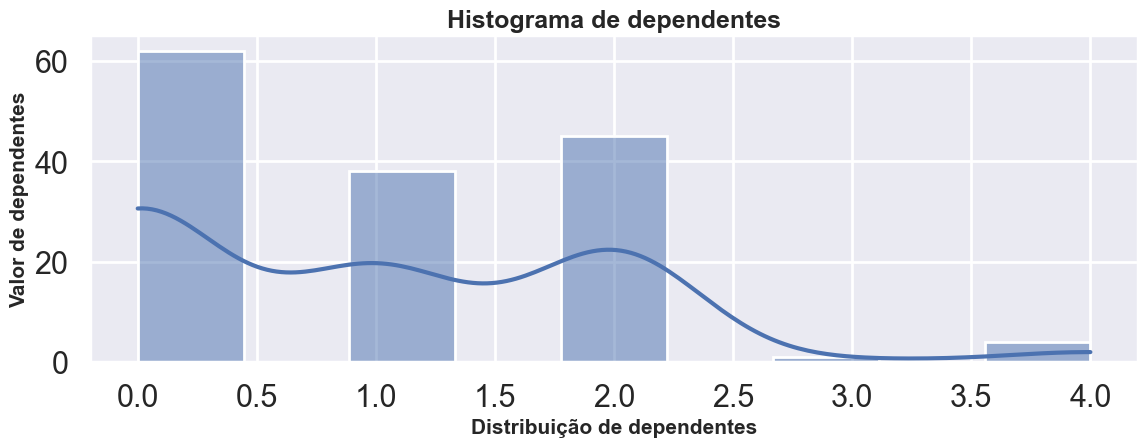

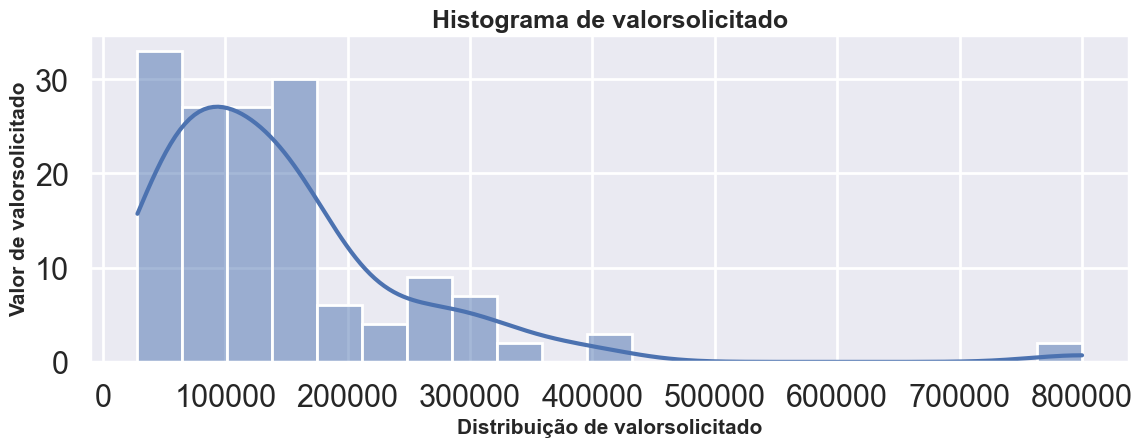

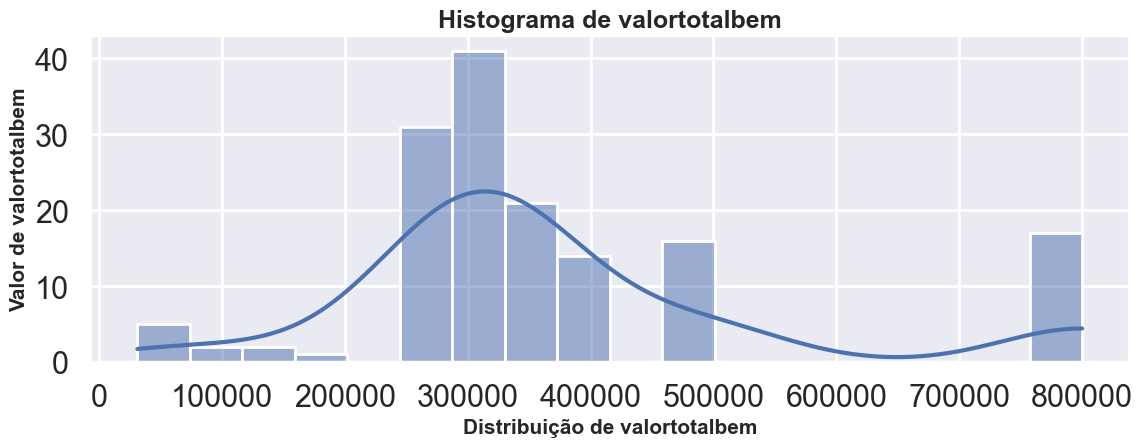

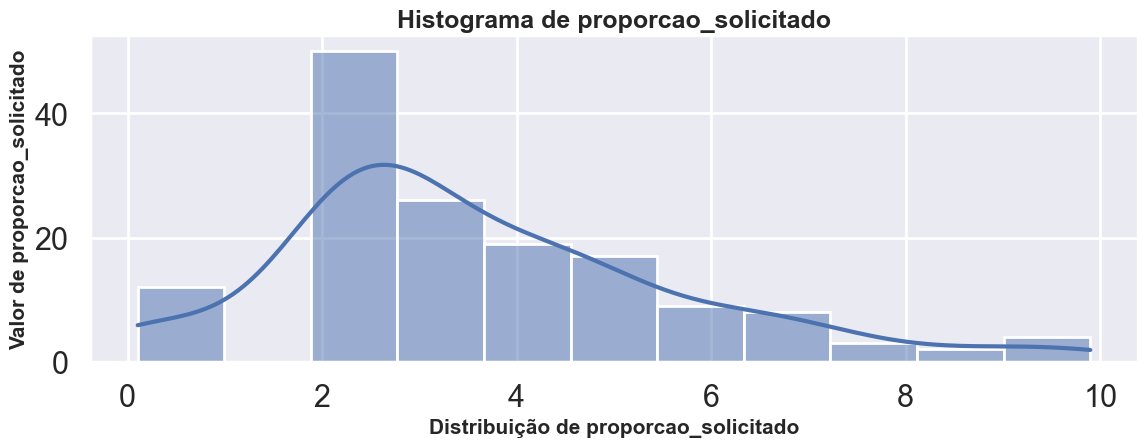

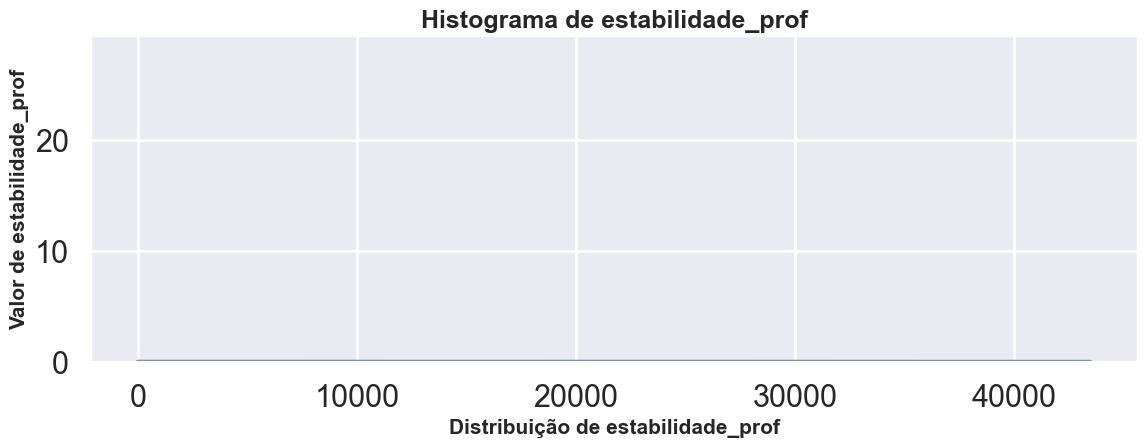

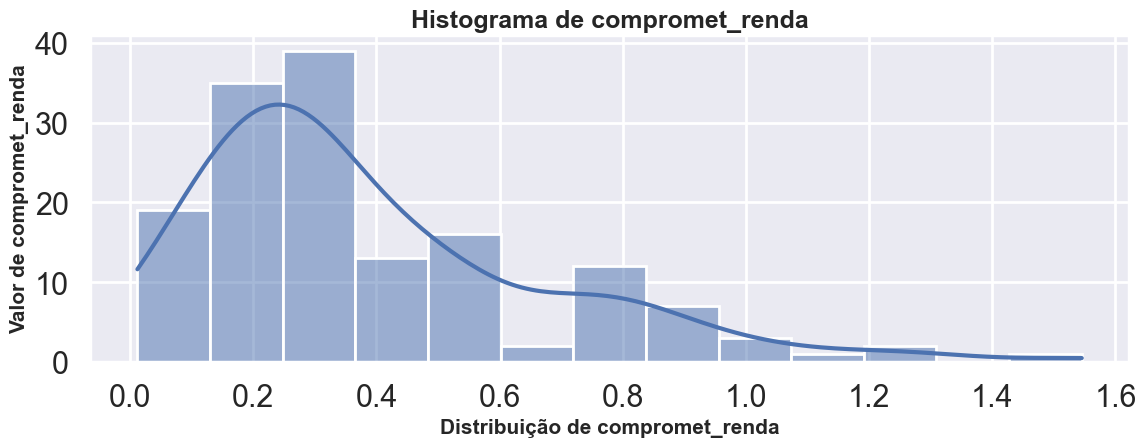

In [32]:
plot_hist(df, colunas_numericas)

In [33]:
df.describe()

,tempoprofissao,renda,idade,dependentes,valorsolicitado,valortotalbem,proporcao_solicitado,estabilidade_prof,compromet_renda
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,6690.573333,36406.813333,47.953333,0.980000,144512.680000,375161.993333,3.629815,290.426694,0.388414
std,81647.612861,12974.282533,20.047372,0.993063,113913.175165,178933.034924,2.063348,3549.934634,0.284998
min,0.000000,7814.000000,22.000000,0.000000,28290.000000,31170.000000,0.104597,0.000000,0.011804
25%,13.000000,24271.750000,36.000000,0.000000,69172.000000,280000.000000,2.256579,0.294807,0.194503
50%,24.000000,35795.000000,47.000000,1.000000,123258.000000,320000.000000,2.969571,0.495283,0.295350
75%,32.750000,46361.000000,58.000000,2.000000,170513.750000,400000.000000,4.724642,0.718571,0.515398
max,999999.000000,59976.000000,225.000000,4.000000,800000.000000,800000.000000,9.897490,43478.217391,1.545358
